In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection  import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import export_graphviz
import graphviz

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Font
matplotlib.rc('font',family = 'NanumGothicCoding')

In [2]:
df_raw = pd.read_csv("./data/HMEQ.csv", encoding = '949')
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [3]:
df_raw.isnull().sum()


BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

(array([1.226e+03, 7.380e+02, 5.680e+02, 3.850e+02, 2.430e+02, 2.110e+02,
        1.170e+02, 4.400e+01, 1.000e+01, 1.000e+00]),
 array([ 0. ,  4.1,  8.2, 12.3, 16.4, 20.5, 24.6, 28.7, 32.8, 36.9, 41. ]),
 <a list of 10 Patch objects>)

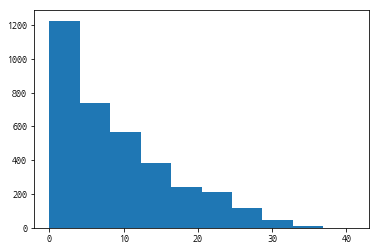

In [18]:
plt.hist(df_raw['YOJ'])

In [13]:
df_raw[df_raw['YOJ'].isnull()].describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,205.000000,205.000000,205.000000,204.000000,0.0,205.000000,205.000000,189.000000,201.000000,205.000000,205.000000
mean,0.068293,22997.073171,62361.468293,98955.034314,NaN,0.209756,0.151220,199.093844,1.054726,19.214634,35.239296
std,0.252865,10604.285631,45089.601097,52635.906208,NaN,0.523846,0.476467,73.006721,1.868687,9.782075,7.950578
min,0.000000,3200.000000,4641.000000,23636.000000,NaN,0.000000,0.000000,5.243341,0.000000,0.000000,12.846006
25%,0.000000,15500.000000,27186.000000,60834.250000,NaN,0.000000,0.000000,164.295050,0.000000,14.000000,30.549216
50%,0.000000,21000.000000,48670.000000,81102.000000,NaN,0.000000,0.000000,204.647992,0.000000,19.000000,37.912872
75%,0.000000,27100.000000,89847.000000,130533.000000,NaN,0.000000,0.000000,247.791991,1.000000,24.000000,41.006103
max,1.000000,43900.000000,179725.000000,251962.000000,NaN,2.000000,4.000000,325.284193,7.000000,50.000000,53.584883


In [14]:
df_raw['YOJ'].describe()

count    3543.000000
mean        9.130398
std         7.637535
min         0.000000
25%         3.000000
50%         7.000000
75%        14.000000
max        41.000000
Name: YOJ, dtype: float64

In [17]:
df_raw['YOJ'].isnull().sum()

205

In [19]:
df_raw['JOB'].fillna('Other', inplace = True)
df_raw.fillna(df_raw.mean(), inplace = True)

In [20]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [21]:
df_raw_y = df_raw_dummy['BAD']
df_raw_x = df_raw_dummy.drop("BAD", axis = 1, inplace = False)
df_raw_x.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [22]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                               , test_size = 0.3, random_state = 1234)
print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data Y size : {}'.format(df_test_y.shape))


train data X size : (2623, 18)
train data Y size : (2623,)
test data X size : (1125, 18)
test data Y size : (1125,)


In [25]:
knn_uncustomized = KNeighborsClassifier()
knn_uncustomized.fit(df_train_x, df_train_y)

print('Accuracy on trainning set : {:.3f}'.format(knn_uncustomized.score(df_train_x, df_train_y)))
print('Accuracy on test set : {:.3f}'.format(knn_uncustomized.score(df_test_x, df_test_y)))

Accuracy on trainning set : 0.916
Accuracy on test set : 0.908


In [27]:
train_accuracy = [];test_accuracy=[]
para_n_negihbors = [i for i in range(1,16)]

for v_n_neighbors in para_n_negihbors:
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors)
    
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n['Neighbors'] = para_n_negihbors
df_accuracy_n['TrainAccuracy'] = train_accuracy
df_accuracy_n['TestAccuracy'] = test_accuracy
df_accuracy_n['Gap'] = np.array(train_accuracy)-np.array(test_accuracy)
df_accuracy_n.round(3)

,Neighbors,TrainAccuracy,TestAccuracy,Gap
0,1,1.000,0.877,0.123
1,2,0.928,0.912,0.016
2,3,0.929,0.913,0.017
3,4,0.916,0.914,0.002
4,5,0.916,0.908,0.009
5,6,0.913,0.911,0.002
6,7,0.913,0.912,0.001
7,8,0.910,0.912,-0.002
8,9,0.911,0.913,-0.002
9,10,0.909,0.910,-0.001


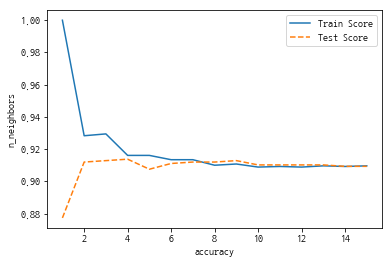

In [28]:
plt.plot(para_n_negihbors, train_accuracy, linestyle = '-', label = 'Train Score')
plt.plot(para_n_negihbors, test_accuracy, linestyle = '--', label = 'Test Score')
plt.xlabel('accuracy'); plt.ylabel('n_neighbors')
plt.legend()

In [29]:
n_neighbors = 4

In [36]:
train_accuracy = [];test_accuracy=[]
para_n_negihbors = [i for i in range(1,11)]*2
para_weights = (['uniform']) * 10 + (['distance']*10)

for (v_n_neighbors, v_weights) in zip(para_n_negihbors, para_weights):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, weights = v_weights)
    
    knn.fit(df_train_x, df_train_y)
    
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
df_accuracy_weights = pd.DataFrame()
df_accuracy_weights['Neighbors'] = para_n_negihbors
df_accuracy_weights['Weights'] = para_weights
df_accuracy_weights['TrainAccuracy'] = train_accuracy
df_accuracy_weights['TestAccuracy'] = test_accuracy
# df_accuracy_weights['Gap'] = np.array(train_accuracy)-np.array(test_accuracy)
df_accuracy_weights.round(3)

,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,1,uniform,1.000,0.877
1,2,uniform,0.928,0.912
2,3,uniform,0.929,0.913
3,4,uniform,0.916,0.914
4,5,uniform,0.916,0.908
5,6,uniform,0.913,0.911
6,7,uniform,0.913,0.912
7,8,uniform,0.910,0.912
8,9,uniform,0.911,0.913
9,10,uniform,0.909,0.910


In [38]:
df_accuracy_weights_pivot = df_accuracy_weights.pivot(index = 'Neighbors', columns = 'Weights', values=['TrainAccuracy', 'TestAccuracy'])
df_accuracy_weights_pivot

TrainAccuracy           TestAccuracy          
Weights        distance   uniform     distance   uniform
Neighbors                                               
1                   1.0  1.000000     0.877333  0.877333
2                   1.0  0.928326     0.877333  0.912000
3                   1.0  0.929470     0.912000  0.912889
4                   1.0  0.916127     0.913778  0.913778
5                   1.0  0.916127     0.912889  0.907556
6                   1.0  0.913458     0.912889  0.911111
7                   1.0  0.913458     0.912889  0.912000
8                   1.0  0.910027     0.913778  0.912000
9                   1.0  0.910789     0.914667  0.912889
10                  1.0  0.908883     0.914667  0.910222